# Free vibration of an SDOF with viscous damping #

In [1]:
import sympy as sp

In [2]:
u = sp.symbols('u',cls=sp.Function)
t, omega_n, m, zeta = sp.symbols('t, omega_n, m, zeta',real=True,positive=True)
u_0, v_0 = sp.symbols('u_0, v_0')

The equation of motion:

In [3]:
Equation_of_Motion= sp.Eq(sp.diff(u(t),t,2)+2*zeta*omega_n*sp.diff(u(t),t)+omega_n **2 * u(t),0)
display(Equation_of_Motion)

Eq(omega_n**2*u(t) + 2*omega_n*zeta*Derivative(u(t), t) + Derivative(u(t), (t, 2)), 0)

In [4]:
u_sol = sp.dsolve(Equation_of_Motion, u(t), ics={u(0): u_0 , u(t).diff(t , 1).subs(t , 0) : v_0}).rhs
display(u_sol)

(-u_0*zeta/(2*sqrt(zeta - 1)*sqrt(zeta + 1)) + u_0/2 - v_0/(2*omega_n*sqrt(zeta - 1)*sqrt(zeta + 1)))*exp(-omega_n*t*(zeta + sqrt(zeta - 1)*sqrt(zeta + 1))) + (omega_n*u_0*zeta**2/(2*omega_n*zeta**2 - 2*omega_n) + omega_n*u_0*zeta*sqrt(zeta - 1)*sqrt(zeta + 1)/(2*omega_n*zeta**2 - 2*omega_n) - omega_n*u_0/(2*omega_n*zeta**2 - 2*omega_n) + v_0*sqrt(zeta - 1)*sqrt(zeta + 1)/(2*omega_n*zeta**2 - 2*omega_n))*exp(omega_n*t*(-zeta + sqrt(zeta - 1)*sqrt(zeta + 1)))

## Super-critically damed system $1 < \xi $ ##


Example plot

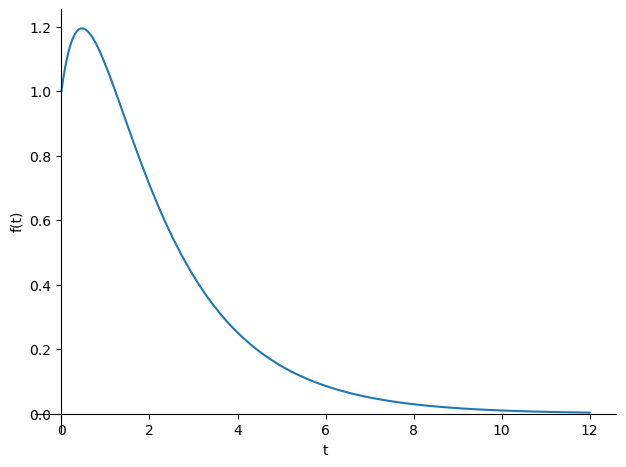

In [5]:
sp.plot(u_sol.subs([(u_0,1),(v_0,1),(omega_n,1),(zeta,1.2)]),(t,0,12));

Effect of the initial displacement:

In [6]:
%matplotlib notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [8]:
u_func = sp.lambdify((u_0,v_0,omega_n,zeta,t),u_sol)

<IPython.core.display.Javascript object>


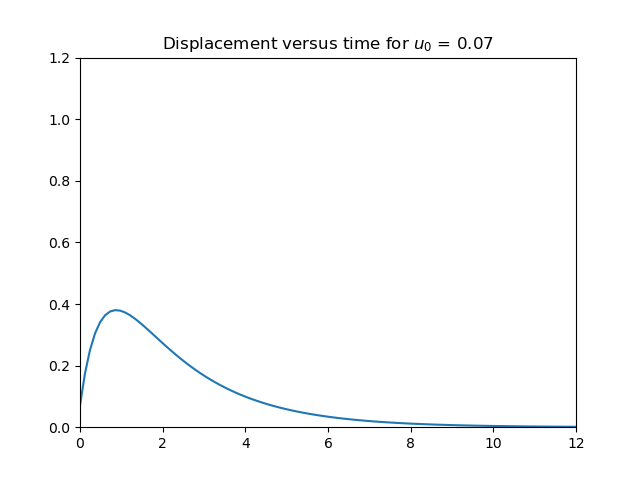

In [9]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_func(u_0=frame,v_0=1,omega_n=1,zeta=1.2,t=tdata)
    ax.set_title("Displacement versus time for $u_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,100),interval = 100)
plt.show()

Effect of the initial velocity:

<IPython.core.display.Javascript object>


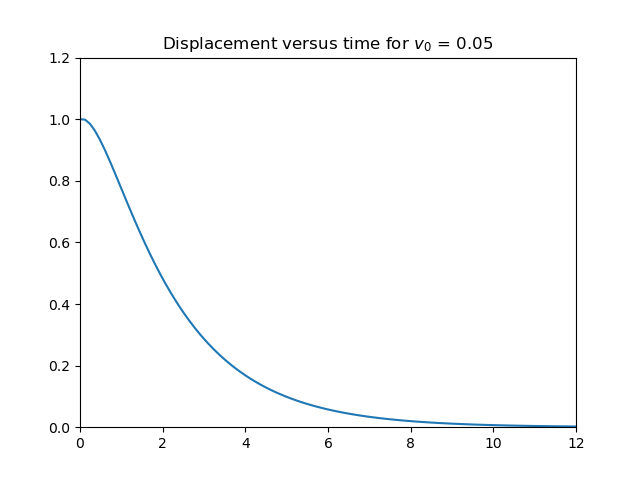

In [10]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_func(u_0=1,v_0=frame,omega_n=1,zeta=1.2,t=tdata)
    ax.set_title("Displacement versus time for $v_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,100),interval = 100)
plt.show()

Effect of the undamped natural frequency:

<IPython.core.display.Javascript object>


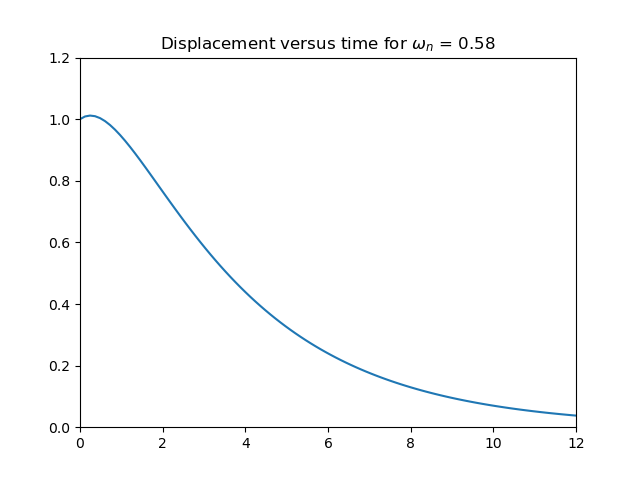

In [11]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_func(u_0=1,v_0=0.1,omega_n=frame,zeta=1.2,t=tdata)
    ax.set_title("Displacement versus time for $\omega_n$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.5,2,100),interval = 100)
plt.show()

Effect of the damping ratio:

<IPython.core.display.Javascript object>


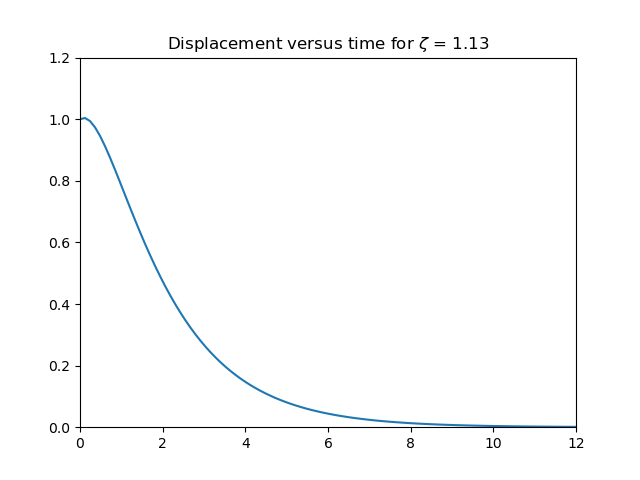

In [12]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_func(u_0=1,v_0=0.1,omega_n=1,zeta=frame,t=tdata)
    ax.set_title("Displacement versus time for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(1.1,2,100),interval = 100)
plt.show()

## Critically damed system $\xi = 1 $ ##


In [13]:
u_crit = sp.limit(u_sol,zeta,1)
display(u_crit)

(omega_n*t*u_0 + t*v_0 + u_0)*exp(-omega_n*t)

Example plot

<IPython.core.display.Javascript object>


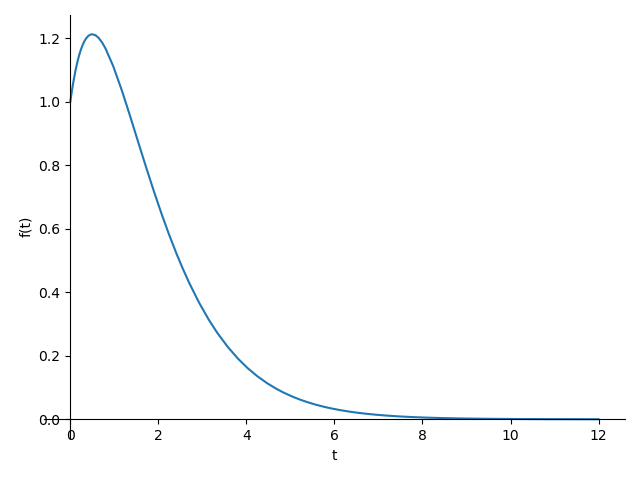

In [14]:
sp.plot(u_crit.subs([(u_0,1),(v_0,1),(omega_n,1),(zeta,1.2)]),(t,0,12));

Effect of the initial displacement

In [15]:
u_crit_func = sp.lambdify((u_0,v_0,omega_n,zeta,t),u_crit)

<IPython.core.display.Javascript object>


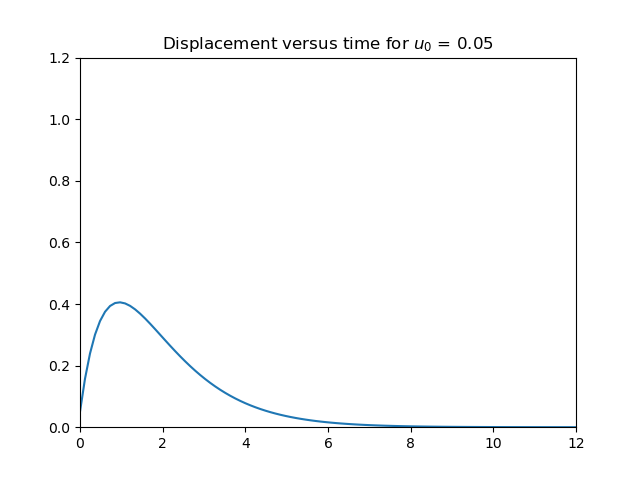

In [16]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_crit_func(u_0=frame,v_0=1,omega_n=1,zeta=1.2,t=tdata)
    ax.set_title("Displacement versus time for $u_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,100),interval = 100)
plt.show()

Effect of the initial velocity

<IPython.core.display.Javascript object>


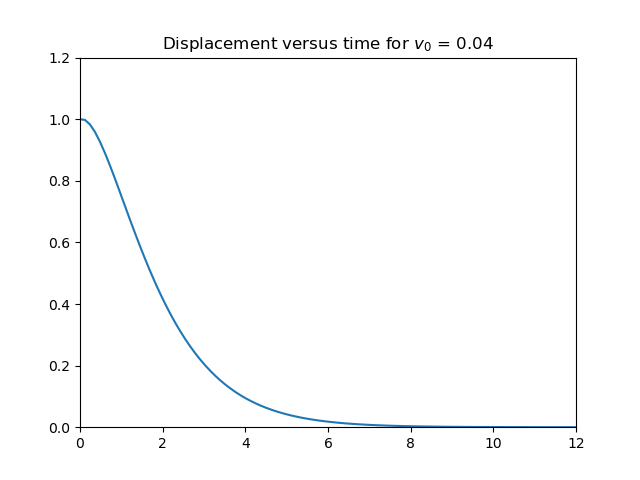

In [17]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_crit_func(u_0=1,v_0=frame,omega_n=1,zeta=1.2,t=tdata)
    ax.set_title("Displacement versus time for $v_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,100),interval = 100)
plt.show()

Effect of undamped natural frequency

<IPython.core.display.Javascript object>


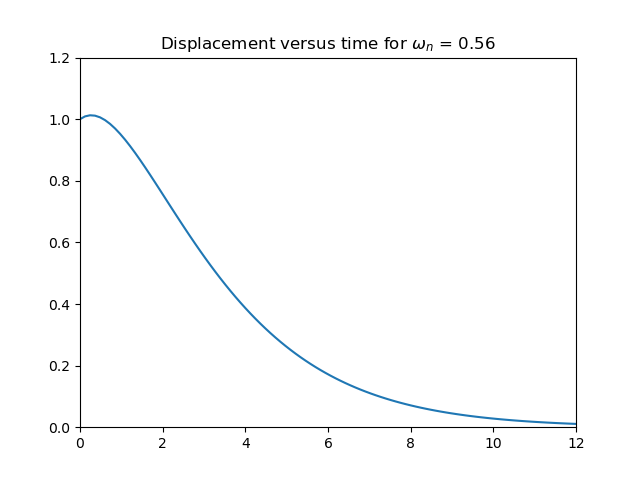

In [18]:
fig, ax = plt.subplots()
tdata = np.linspace(0,12,100)
line, = ax.plot([], [])
ax.set_xlim(0, 12)
ax.set_ylim(0, 1.2)

def update(frame):
    ydata = u_crit_func(u_0=1,v_0=0.1,omega_n=frame,zeta=1.2,t=tdata)
    ax.set_title("Displacement versus time for $\omega_n$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.5,2,100),interval = 100)
plt.show()

## Sub-critically damped system $\xi < 1 $ ##

In [19]:
u_sol_sub = sp.exp(-zeta*omega_n*t)*(u_0*sp.cos(omega_n**sp.sqrt(1-zeta**2)*t)+(v_0+zeta*omega_n*u_0)/(omega_n*sp.sqrt(1-zeta**2))*sp.sin(omega_n*sp.sqrt(1-zeta**2)*t))
display(u_sol_sub)

(u_0*cos(omega_n**(sqrt(1 - zeta**2))*t) + (omega_n*u_0*zeta + v_0)*sin(omega_n*t*sqrt(1 - zeta**2))/(omega_n*sqrt(1 - zeta**2)))*exp(-omega_n*t*zeta)

Example plot

<IPython.core.display.Javascript object>


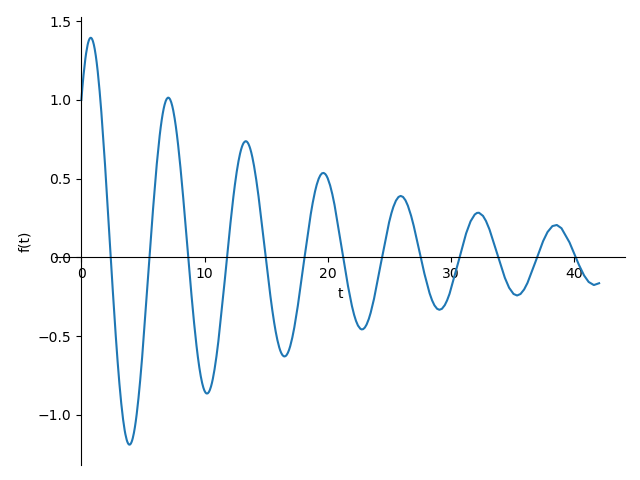

In [20]:
sp.plot(u_sol_sub.subs([(u_0,1),(v_0,1),(omega_n,1),(zeta,0.05)]),(t,0,42));

Effect of the initial displacement:

In [21]:
u_sub_func = sp.lambdify((u_0,v_0,omega_n,zeta,t),u_sol_sub)

<IPython.core.display.Javascript object>


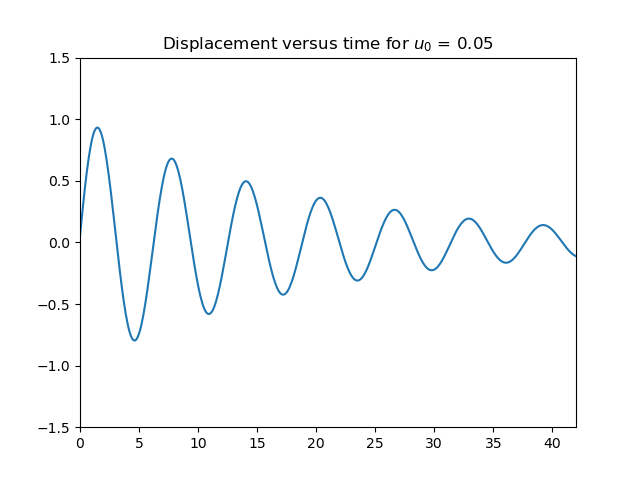

In [22]:
fig, ax = plt.subplots()
tdata = np.linspace(0,42,500)
line, = ax.plot([], [])
ax.set_xlim(0, 42)
ax.set_ylim(-1.5, 1.5)

def update(frame):
    ydata = u_sub_func(u_0=frame,v_0=1,omega_n=1,zeta=0.05,t=tdata)
    ax.set_title("Displacement versus time for $u_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,100),interval = 100)
plt.show()

Effect of the initial velocity:

<IPython.core.display.Javascript object>


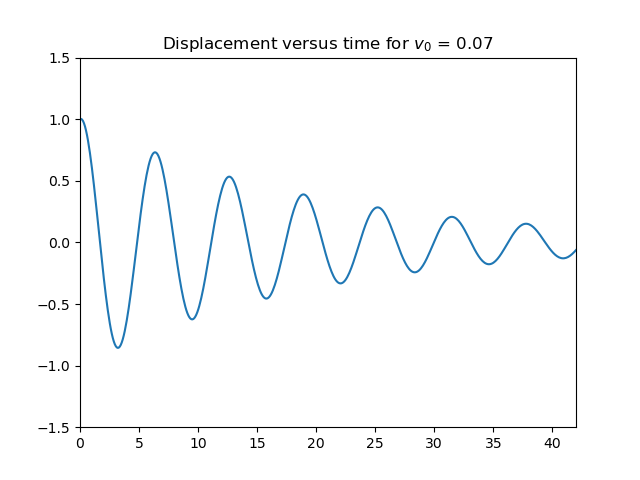

In [23]:
fig, ax = plt.subplots()
tdata = np.linspace(0,42,500)
line, = ax.plot([], [])
ax.set_xlim(0, 42)
ax.set_ylim(-1.5, 1.5)

def update(frame):
    ydata = u_sub_func(u_0=1,v_0=frame,omega_n=1,zeta=0.05,t=tdata)
    ax.set_title("Displacement versus time for $v_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,100),interval = 100)
plt.show()

Effect of the undamped natural frequency:

<IPython.core.display.Javascript object>


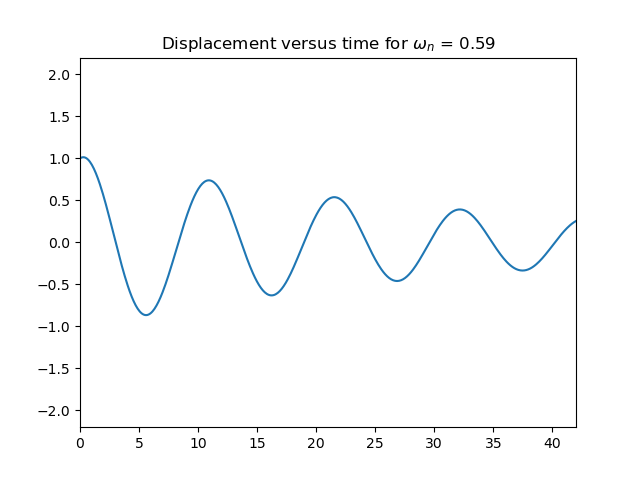

In [24]:
fig, ax = plt.subplots()
tdata = np.linspace(0,42,500)
line, = ax.plot([], [])
ax.set_xlim(0, 42)
ax.set_ylim(-2.2,2.2)

def update(frame):
    ydata = u_sub_func(u_0=1,v_0=0.1,omega_n=frame,zeta=0.05,t=tdata)
    ax.set_title("Displacement versus time for $\omega_n$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.5,2,100),interval = 100)
plt.show()

Effect of the damping ratio

<IPython.core.display.Javascript object>


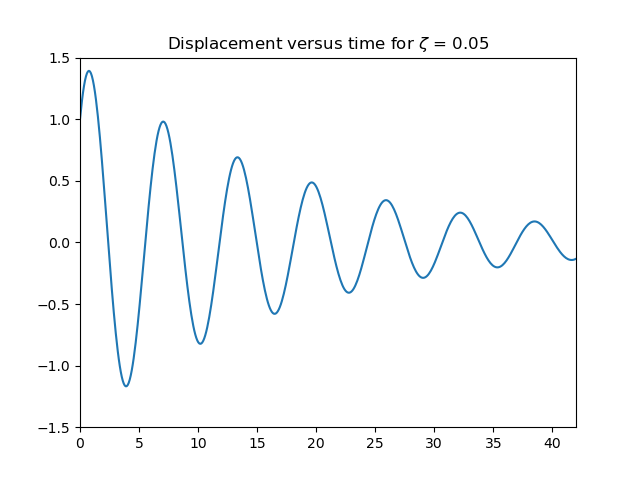

In [25]:
fig, ax = plt.subplots()
tdata = np.linspace(0,42,500)
line, = ax.plot([], [])
ax.set_xlim(0, 42)
ax.set_ylim(-1.5,1.5)

def update(frame):
    ydata = u_sub_func(u_0=1,v_0=1,omega_n=1,zeta=frame,t=tdata)
    ax.set_title("Displacement versus time for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.01,0.9,100),interval = 100)
plt.show()